In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

%run ../src/stochastic_helpers.py

In [5]:
def evaluate_bag(bag, n_samples=10000):
    bag_weight_sampler = create_bag_weight_sampler(bag)
    bag_weight_samples = bag_weight_sampler(n_samples)
    
    return np.mean(bag_weight_samples)

In [6]:
num_gifts_available = {
    "horse": 1000,
    "ball": 1100,
    "bike": 500,
    "train": 1000,
    "book": 1200,
    "doll": 1000,
    "blocks": 1000,
    "gloves": 200,
    "coal": 166
}

In [7]:
best_submission = pd.read_csv('../submissions/best_submission/submission_9_shuffled_bikes.csv')

In [8]:
best_submission.head()

,Gifts
0,horse_382 horse_348 horse_638 horse_501 horse_...
1,horse_125 horse_577 horse_534 horse_436 horse_...
2,horse_760 horse_629 horse_347 horse_417 horse_...
3,horse_187 horse_472 horse_970 horse_952 horse_...
4,horse_632 horse_12 horse_274 horse_214 horse_6...


In [9]:
num_items = best_submission.Gifts.map(lambda x: len(x.split()))

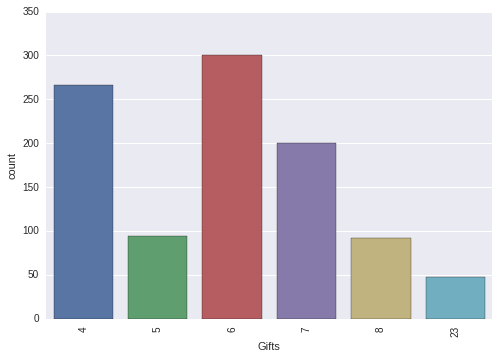

In [199]:
sns.countplot(num_items)
plt.xticks(rotation=90);

In [200]:
mask = num_items == 23
best_submission.loc[mask].shape

(47, 1)

In [11]:
coal_index = 130
ball_index  = 0
subset = []

for idx in best_submission.loc[mask].index.values[:5]:
    top_2 = list(best_submission.ix[idx, 'Gifts'].split()[:2])
    top_2.append('coal_%d'%(coal_index))
    
    coal_index += 1
    
    subset.append(' '.join(top_2))

NameError: name 'mask' is not defined

In [244]:
best_submission.Gifts.iloc[953:963] = subset

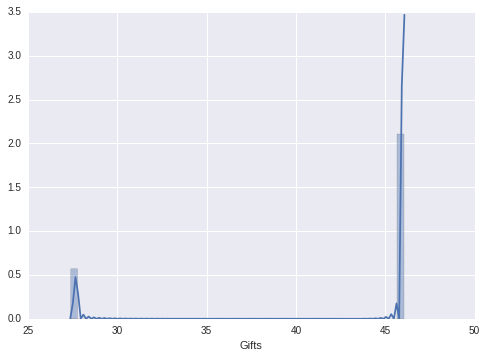

In [245]:
def prepare_list(count_dict):
    count_items = np.zeros(shape=(9,), dtype=int)
    
    for k, v in count_dict.items():
        index = gift_types.index(k)
        count_items[index] = v
    
    return count_items
    
sns.distplot(best_submission.loc[mask, 'Gifts'].map(lambda x: x.split())\
.map(lambda x: [item.split('_')[0] for item in x]).map(lambda x: Counter(x))\
.map(prepare_list).map(evaluate_bag))

In [63]:
# np.random.seed(np.random.randint(0, 100))
def shuffle_submissions(gift_type, seed):
    np.random.seed(seed) # set seed to generate different possible shuffles
    pattern = r'%s_[0-9]+'%(gift_type)
    max_possible_count = num_gifts_available[gift_type]
    
    def get_replacement_size():
        return len(re.findall(r'%s_[0-9]+'%(gift_type), ' '.join(best_submission.Gifts.values)))
    
    def generate_replacement_set(size):
        return np.random.choice(np.arange(0, 1000), size, replace=False)
    
    replacement_size = get_replacement_size()
    replacement_set  = list(generate_replacement_set(replacement_size))
    
#     print('replacement_size ', replacement_size)
#     print('replacement set', replacement_set)
    
    def shuffle_type(string):
        split_string  = string.split()
        gifts_found = re.findall(pattern, string)
        replaced    = []
        
        for i, str_ in enumerate(split_string):
            if str_ in gifts_found:
                replacement = replacement_set.pop()
                replaced.append(re.sub(pattern, '%s_%s'%(gift_type, str(replacement)), str_))
            else:
                replaced.append(str_)
        
        return ' '.join(replaced)
    
    shuffled = best_submission.Gifts.map(shuffle_type)
    shuffled_df = pd.DataFrame({'Gifts': shuffled})
    return shuffled_df

In [64]:
shuffled_df = shuffle_submissions('train', np.random.randint(100))

replacement_size  997


In [246]:
best_submission.to_csv('../submissions/best_submission/submission_9_shuffled_bikes_with_10_coals.csv', index=False)